In [10]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
class LinearRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, X):
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)
    
    def __loss(self, X, y,theta):
        # this is the loss function which we use to minimize the error of our model
        n = y.shape[0]
        total_cost = 0
        for i in range(n):
            total_cost +=(1/n)*((X[i]*theta).sum()-y[i])**2
        return total_cost

    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            yp = np.dot(X, self.W)
             
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            
            # this is where the loss is calculated
            loss = self.__loss(X, y,self.W)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # this is the final prediction that is generated based on the values learned.
        return (np.dot(X, self.W))
    
    

In [12]:
class GradientDescent():
    def __init__(self,learning_rate = 0.01,iterations = 100):
        self.learning_rate=learning_rate
        self.iterations = iterations
        self.weights = np.array([])

    def cost_function(self,x,y):
        n = y.shape[0]
        total_cost = 0
        for i in range(n):
            total_cost +=(1/n)*((x[i]*self.weights).sum()-y[i])**2
        return total_cost

    def gradient_descent(self,x,y):
        cost_array = np.zeros(self.iterations)
        n = y.shape[0]

        for i in range(self.iterations):
            predictions = np.dot(x,m_array)
            error = predictions - y
            gradient = np.dot(x.T,error)/n
            m_array -= self.learning_rate * gradient
            print(self.cost_function(x,y))
            cost_array[i] = self.cost_function(x,y)
        return m_array,cost_array

    def fit(self,x,y,out = 'True'):
        X = np.c_[x, np.ones(x.shape[0])]

        # Initialize Theta Values to 0
        self.weights = np.zeros(x.shape[1])
        if(out == True):
            print(f'With initial theta values of {self.weights}, cost error is {self.cost_function(x, y)}')

        # Run Gradient Descent
        theta, cost_num = self.gradient_descent(x, y)
        if(out==True):
            print(f'With Final theta values of {self.weights}, cost error is {self.cost_function(x, y)}')
        final_cost = self.cost_function(x, y)

        return theta,cost_num,final_cost
    
    def predict(self,x):
        weights = self.weights
        predicted_result = np.dot(x,np.transpose(weights))
        return predicted_result

In [13]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, X):
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        # this is the loss function which we use to minimize the error of our model
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, y)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # this is the final prediction that is generated based on the values learned.
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, X):
        return self.predict_prob(X).round()

In [14]:
class node():
    def __init__(self,left=None,right=None,feuture_index=None,threshold=None,info_gain=None,depth=None,value=None,no_ofsamples = None):
        self.left = left
        self.right = right
        self.value = value
        self.feature_index = feuture_index
        self.threshold = threshold
        self.info_gain = info_gain
        self.depth = depth
        self.no_ofsamples = no_ofsamples

class DecisionTree():
    def __init__(self,root=None,max_depth=23,min_samples=2,Target_names=[],ind = []):
        self.root = root
        self.max_depth = (max_depth)
        self.min_samples = (min_samples)
        self.node_list = []
        self.leaf_list = []
        self.target_names = Target_names
        self.ind = ind

    def buildTree(self,dataset,curr_depth=0):
        
        
        label = dataset[:,-1]
        unique_classes,unique_class_count = np.unique(label,return_counts=True)

        if len(unique_classes)==1:
            self.leaf_list.append([curr_depth,self.target_names[int(unique_classes[0])],f'curr_depth={curr_depth}',f'Samples = {unique_class_count}'])
            self.node_list.append([curr_depth,self.target_names[int(unique_classes[0])],f'curr_depth={curr_depth}',f'Samples = {unique_class_count}'])
            return node(feuture_index=unique_classes[0],depth=curr_depth,no_ofsamples=unique_class_count)

        x,y = dataset[:,:-1],dataset[:,-1]
        no_samples , no_features = np.shape(x)
        if(no_samples>self.min_samples and curr_depth<self.max_depth):
            split = self.get_bestsplit(dataset,no_features)
            if split['info_gain'] > 0:
                self.node_list.append([curr_depth,self.ind[split['feature_index']],split['threshold'],f"info_gain = {split['info_gain']}",f'curr_depth={curr_depth}',f'Samples = {unique_class_count}'])
                left_subtree = self.buildTree(split['left_data'],curr_depth+1)
                right_subtree = self.buildTree(split['right_data'],curr_depth+1)
                
                return node(left_subtree,right_subtree,split['feature_index'],split['threshold'],split['info_gain'],curr_depth)
            
        leaf_value =  self.return_leafvalue(y)
        self.leaf_list.append([curr_depth,self.target_names[int(unique_classes[0])],f'curr_depth={curr_depth}',f'Samples = {unique_class_count}'])
        self.node_list.append([curr_depth,self.target_names[int(unique_classes[0])],f'curr_depth={curr_depth}',f'Samples = {unique_class_count}'])
        return node(value=leaf_value)
    
    def return_leafvalue(self,y):
        y = list(y)
        return max(y,key=y.count)

    def get_bestsplit(self,dataset,num_features):
        best_split = {}
        max_info_gain = -float('inf')
        parent_entropy = self.calculate_entropy(dataset)
        best_entropy = parent_entropy

        mode = 'gini'

        for feature_index in range(num_features):
            feature = dataset[:,feature_index]
            possible_thresholds = np.unique(feature)
            for threshold in possible_thresholds:
                left_data,right_data = self.split(dataset,feature_index,threshold)
                if(len(left_data)>0 and len(right_data)>0) and mode=='gini':
                    curr_info_gain = self.info_gain(dataset,left_data,right_data)
                    
                    if max_info_gain<curr_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["feature_name"] = self.ind[feature_index]
                        best_split["threshold"] = threshold
                        best_split["left_data"] = left_data
                        best_split["right_data"] = right_data
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

                elif(len(left_data)>0 and len(right_data)>0) and mode=='entropy':
                    child_entropy = self.info_gain(dataset,left_data,right_data)
                    
                    if best_entropy > child_entropy:
                        best_split["feature_index"] = feature_index
                        best_split["feature_name"] = self.ind[feature_index]
                        best_split["threshold"] = threshold
                        best_split["left_data"] = left_data
                        best_split["right_data"] = right_data
                        best_entropy = child_entropy
                        information_gain = parent_entropy - best_entropy
                        best_split["info_gain"] = information_gain


        return best_split

    def calculate_entropy(self,data):
        label = data[:,-1]
        _,counts = np.unique(label,return_counts=True)

        probabilities = counts/counts.sum()
        entropy = sum(probabilities * -np.log2(probabilities))
        return entropy

    def get_child_entropy(self,data,left_dataset,right_dataset):
        total_len = len(left_dataset) + len(right_dataset)
        left_dataset_entropy = self.calculate_entropy(left_dataset)
        right_dataset_entropy = self.calculate_entropy(right_dataset)

        child_entropy = len(left_dataset)/total_len * left_dataset_entropy + len(right_dataset)/total_len * right_dataset_entropy
        return child_entropy

    def info_gain(self,data,left_data,right_data):
        weight_l = len(left_data)/len(data)
        weight_r = len(right_data)/len(data)
        
        info_gain = self.gini_index(data) -  (weight_l * self.gini_index(left_data) + weight_r * self.gini_index(right_data))

        return info_gain

    def gini_index(self,data):
        labels = np.unique(data)
        gini = 0
        for i in labels:
            p_clas = len(data[data==i])/len(data)
            gini+=p_clas**2
        return 1-gini

    def split(self,dataset,feature,threshold):
        dataset_left = np.array([row for row in dataset if row[feature]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature]>threshold])
        return dataset_left,dataset_right

    def fit(self,x,y):
        data = np.c_[x,y]
        self.root = self.buildTree(data)

    def return_node_list(self):
        lis = []
        for i in self.node_list:
            lis.append(i.return_vals())
        return lis


In [15]:
class Naive_bayes():
    def __init__(self):
        pass

    def fit(self,x_train,y_train):
        result = {}
        result['Total_data'] = len(y_train)
        class_names = set(y_train)
        for current_class in class_names:
            result[current_class] = {}
            curr_class_rows = (y_train==current_class)
            x_train_curr = x_train[curr_class_rows]
            y_train_curr = y_train[curr_class_rows]
            no_features = x_train.shape[1]
            result[current_class]['Total_Count'] = len(y_train_curr)

            for j in range(1,no_features+1):
                result[current_class][j] = {}
                all_posible_values = set(x_train[:,j-1])
                for curr_value in all_posible_values:
                    result[current_class][j][curr_value] = (x_train_curr[:,j-1]==curr_value).sum()

        return result
    
    def probabilty(self,dictionary,x,curr_class):
        output = np.log(dictionary[curr_class]["Total_Count"])-np.log(dictionary['Total_data'])
        num_features = len(dictionary[curr_class].keys())-1

        for j in range(1,num_features+1):
            xj = x[j-1]
            count_of_class_with_xj = dictionary[curr_class][j][xj] + 1
            count_of_class = dictionary[curr_class]['Total_Count'] + len(dictionary[curr_class][j].keys())
            prob = np.log(count_of_class_with_xj)-np.log(count_of_class)
            output+=prob
        return output
    
    def singlepoint(self,dictionary,x):
        classes = dictionary.keys()
        best_p = -1000
        best_class = -1
        first_run = True
        for curr_class in classes:
            if curr_class=='Total_data':
                continue
            p_curr_class = self.probabilty(dictionary,x,curr_class)
            if(first_run or p_curr_class>best_p):
                best_p=p_curr_class
                best_class = curr_class
            first_run = False

        return best_class
    
    def predict(self,dictionary,x_test):
        y_pred =[]
        for x in x_test:
            x_class = self.singlepoint(dictionary,x)
            y_pred.append(x_class)

        return y_pred
    
    def marked_label(self,col):
        second_limit = col.mean()
        first_limit = 0.5*second_limit
        third_limit = 1.5*second_limit

        for i in range(len(col)):
            if col[i]<first_limit:
                col[i] = 0
            elif col[i]<second_limit:
                col[i] = 1
            elif col[i]<third_limit:
                col[i] = 2
            else:
                col[i]= 3
        return col

In [16]:
class KNN():
    def __init__(self,x_train,y_train,x_test,k):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.k = k

    def predict_one(self,x):
        dist = []
        for i in range(len(self.x_train)):
            dis = ((self.x_train[i,:] - x)**2).sum()
            dist.append([dis,i])
            
        dist = sorted(dist)
        target = []
        for i in range(self.k):
            idx = dist[i][1]
            target.append(self.y_train[idx])
        
        return Counter(target).most_common()[0][0]

    def predict(self):
        predictions = []
        for x in self.x_test:
            predictions.append(self.predict_one(x))
        return predictions

In [17]:
class SVM:
    def __init__(self, alpha = 0.001, lambda_ = 0.01, epochs = 1000):
        self.alpha = alpha
        self.lambda_ = lambda_
        self.epochs = epochs
        self.w = 0
        self.b = None


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for epoch in range(self.epochs):
            for i, Xi in enumerate(X):
                
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i]))
                    self.b -= self.alpha * y[i]
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else -1 for val in pred]
        return result
    
    def get_hyperplane(self,x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    def plot_svm(self,X, y, w, b, title ='Plot for linear SVM'):    

        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        plt.scatter(X[:,0], X[:,1], marker='o',c=y)

        x0_1 = np.amin(X[:,0])
        x0_2 = np.amax(X[:,0])

        x1_1 = self.get_hyperplane(x0_1, w, b, 0)
        x1_2 = self.get_hyperplane(x0_2, w, b, 0)

        x1_1_m = self.get_hyperplane(x0_1, w, b, -1)
        x1_2_m = self.get_hyperplane(x0_2, w, b, -1)

        x1_1_p = self.get_hyperplane(x0_1, w, b, 1)
        x1_2_p = self.get_hyperplane(x0_2, w, b, 1)

        ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
        ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
        ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

        x1_min = np.amin(X[:,1])
        x1_max = np.amax(X[:,1])
        ax.set_ylim([x1_min-3,x1_max+3])
        
        plt.title(title)
        plt.show()


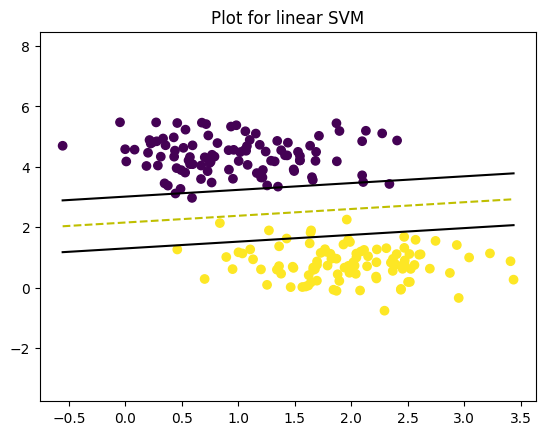

In [20]:
sv = SVM()
from sklearn.datasets import make_blobs

x1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)

w1,b1 = sv.fit(x1,y1)

sv.plot_svm(x1,y1,w1,b1)